In [1]:
!pip install pickle5
import pickle5 as pickle

In [85]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,854 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and di

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
with open('/content/gdrive/My Drive/project/seoul_contest/대체시설tfidf.pkl', 'rb') as f:  
  academy = pickle.load(f)

In [4]:
dolbom = pd.read_csv('/content/gdrive/My Drive/project/seoul_contest/행정동별_공적돌봄시설_필요지수_대체시설제외.csv')

In [5]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정동코드      424 non-null    object 
 1   행정동        424 non-null    object 
 2   5-14세      424 non-null    int64  
 3   5-9세(저학년)  424 non-null    int64  
 4   행정구역       424 non-null    object 
 5   시군구        424 non-null    object 
 6   예술학원       424 non-null    int64  
 7   보습학원개수     424 non-null    float64
 8   총학원수       424 non-null    float64
 9   tfidf      424 non-null    float64
 10  1인당학원수     424 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 39.8+ KB


In [6]:
academy[academy['행정동']=='신사동']
# 강남구 :1168051000
# academy[academy.iloc[304]['행정동코드']='1168051000']
# academy[academy['행정동']=='신사동'][academy['시군구']=='강남구']['행정동코드']=='1168051000'

,행정동코드,행정동,5-14세,5-9세(저학년),행정구역,시군구,예술학원,보습학원개수,총학원수,tfidf,1인당학원수
303,1162068500,신사동,939,443,신사동,관악구,15,7.0,22.0,0.001718,0.023429
304,1162068500,신사동,939,443,신사동,강남구,67,7.0,74.0,0.005777,0.078807


In [7]:
# 특정 한 셀만 값 바꾸기
academy.at[304,'행정동코드'] = '1168051000'

In [8]:
academy[academy['행정동']=='신사동']

,행정동코드,행정동,5-14세,5-9세(저학년),행정구역,시군구,예술학원,보습학원개수,총학원수,tfidf,1인당학원수
303,1162068500,신사동,939,443,신사동,관악구,15,7.0,22.0,0.001718,0.023429
304,1168051000,신사동,939,443,신사동,강남구,67,7.0,74.0,0.005777,0.078807


In [9]:
academy[['예술학원','5-14세','5-9세(저학년)']] = academy[['예술학원','5-14세','5-9세(저학년)']].apply(pd.to_numeric)

In [10]:
dolbom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   행정동코드                 424 non-null    int64  
 1   행정동                   424 non-null    object 
 2   0509세                 424 non-null    int64  
 3   1014세                 424 non-null    int64  
 4   0514세                 424 non-null    int64  
 5   시군구명                  424 non-null    object 
 6   키움센터_상시돌봄정원           424 non-null    float64
 7   키움센터_일시돌봄정원           424 non-null    float64
 8   키움센터_개수               424 non-null    float64
 9   초등돌봄교실_이용인원           424 non-null    float64
 10  초등돌봄교실_교실개수           424 non-null    float64
 11  지역아동센터_정원             424 non-null    float64
 12  지역아동센터_개수             424 non-null    float64
 13  방과후아카데미_정원            424 non-null    float64
 14  방과후아카데미_개수            424 non-null    float64
 15  총시설수                  4

In [11]:
dolbom.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율'],
      dtype='object')

In [12]:
# int64 merge error
dolbom['행정동코드']=dolbom['행정동코드'].astype(str)
dolbom['0514세']=dolbom['0514세'].astype(int)
dolbom['1014세']=dolbom['1014세'].astype(int)
dolbom['0509세']=dolbom['0509세'].astype(int)

In [55]:
suyo = pd.merge(dolbom,academy,how='left',on=['행정동코드'])
# suyo = pd.merge(dolbom.set_index('행정동코드'),academy.set_index('행정동코드'),left_index=True,right_index=True)
# suyo

In [59]:
suyo.columns
suyo = suyo[['행정동코드', '행정동_x', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf_x', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', 'tfidf_y', '1인당학원수']]

In [60]:
suyo.columns = ['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '시설tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '시설 정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '대체시설tfidf', '1인당학원수']

### 수요지수

- 돌봄교실이 없는 행정동이 많기 때문에 이용비율 0 이 많다
- 이용비율을 tfidf 에 곱해버리면 중요도가 0 이 되어버림
- 학원tfidf 가 높을 수록 센터의 수요가 있을 것임 !? or 학원이 이미 대체하고 있으므로 센터의 수요가 없을것 ?
- 아마도 학원이 많은건 센터의 수요가 없다고 가정해서 학원tfidf 를 나눠줌(역수)

수요 지수 = (동별 5-14세 인구 비율) * (센터 tfidf / 대체시설 tfidf)

In [61]:
suyo['수요지수'] =  suyo['tfidf*정원 및 이용비율*인구비율'] /suyo['대체시설tfidf']

In [62]:
suyo

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,시설tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,시설 정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,대체시설tfidf,1인당학원수,수요지수
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,21.0,65.0,2.0,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,0.000107,90.000058,8.478597e-01,35,17.0,52.0,0.004060,0.010107,208.850677
1,1153078000,오류제2동,2428,2079,4507,구로구,34.0,7.0,1.0,361.0,17.0,54.0,2.0,0.0,0.0,20.0,1.121626,0.008265,0.009270,0.006180,0.000057,96.000058,6.654787e-01,44,26.0,70.0,0.005465,0.015531,121.773100
2,1150063000,방화제1동,2749,2221,4970,강서구,20.0,0.0,1.0,293.0,12.0,74.0,3.0,0.0,0.0,16.0,0.907983,0.006708,0.006091,0.006815,0.000042,95.000058,5.878750e-01,42,47.0,89.0,0.006948,0.017907,84.607766
3,1138069000,진관동,3294,4090,7384,은평구,20.0,4.0,1.0,464.0,21.0,19.0,1.0,0.0,0.0,23.0,1.281858,0.010623,0.013617,0.010126,0.000138,44.000058,5.710998e-01,37,27.0,64.0,0.004996,0.008667,114.300271
4,1138062500,역촌동,1694,1687,3381,은평구,20.0,4.0,1.0,134.0,6.0,152.0,4.0,0.0,0.0,11.0,0.640929,0.003068,0.001966,0.004636,0.000009,177.000058,5.259636e-01,28,43.0,71.0,0.005543,0.021000,94.888270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,112,68,180,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000247,0.000000,1.000058,1.318420e-05,3,0.0,3.0,0.000234,0.016667,0.056292
420,1114059000,광희동,75,95,170,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000233,0.000000,1.000058,1.245174e-05,1,0.0,1.0,0.000078,0.005882,0.159494
421,1111054000,삼청동,59,106,165,종로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000226,0.000000,1.000058,1.208551e-05,1,0.0,1.0,0.000078,0.006061,0.154803
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000,1.000058,3.222804e-06,2,0.0,2.0,0.000156,0.045455,0.020640


In [63]:
# # >>> num = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# q1 = suyo['수요지수'].quantile(.25)
# q3 = suyo['수요지수'].quantile(.75)
# iqr = q3 - q1
# q2 = suyo['수요지수'].quantile(.5)
# q4 = suyo['수요지수'].quantile(1)

#### 수요지수 4분위 수로 나타내기 (IQR)

In [66]:
suyo['수요지수']

0      208.850677
1      121.773100
2       84.607766
3      114.300271
4       94.888270
          ...    
419      0.056292
420      0.159494
421      0.154803
422      0.020640
423      0.005160
Name: 수요지수, Length: 424, dtype: float64

In [67]:
q1 = suyo['수요지수'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
q3 = suyo['수요지수'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
iqr = q3 - q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
q2 = suyo['수요지수'].describe()['50%']  # Q2 (중앙값) 백분위수 50%
print(q1)

0.4930411205367268


In [68]:
suyo['IQR'] = 0
suyo.loc[(suyo['수요지수'] <= q1),'IQR'] = '1'
suyo.loc[(suyo['수요지수'] > q1) & (suyo['수요지수'] <= q2),'IQR'] = '2'
suyo.loc[(suyo['수요지수'] > q2) & (suyo['수요지수'] <= q3),'IQR'] = '3'
suyo.loc[(suyo['수요지수'] > q3),'IQR'] = '4'

In [69]:
suyo

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,시설tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,시설 정원 및 이용비율,tfidf*정원 및 이용비율*인구비율,예술학원,보습학원개수,총학원수,대체시설tfidf,1인당학원수,수요지수,IQR
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,21.0,65.0,2.0,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,0.000107,90.000058,8.478597e-01,35,17.0,52.0,0.004060,0.010107,208.850677,4
1,1153078000,오류제2동,2428,2079,4507,구로구,34.0,7.0,1.0,361.0,17.0,54.0,2.0,0.0,0.0,20.0,1.121626,0.008265,0.009270,0.006180,0.000057,96.000058,6.654787e-01,44,26.0,70.0,0.005465,0.015531,121.773100,4
2,1150063000,방화제1동,2749,2221,4970,강서구,20.0,0.0,1.0,293.0,12.0,74.0,3.0,0.0,0.0,16.0,0.907983,0.006708,0.006091,0.006815,0.000042,95.000058,5.878750e-01,42,47.0,89.0,0.006948,0.017907,84.607766,4
3,1138069000,진관동,3294,4090,7384,은평구,20.0,4.0,1.0,464.0,21.0,19.0,1.0,0.0,0.0,23.0,1.281858,0.010623,0.013617,0.010126,0.000138,44.000058,5.710998e-01,37,27.0,64.0,0.004996,0.008667,114.300271,4
4,1138062500,역촌동,1694,1687,3381,은평구,20.0,4.0,1.0,134.0,6.0,152.0,4.0,0.0,0.0,11.0,0.640929,0.003068,0.001966,0.004636,0.000009,177.000058,5.259636e-01,28,43.0,71.0,0.005543,0.021000,94.888270,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,112,68,180,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000247,0.000000,1.000058,1.318420e-05,3,0.0,3.0,0.000234,0.016667,0.056292,1
420,1114059000,광희동,75,95,170,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000233,0.000000,1.000058,1.245174e-05,1,0.0,1.0,0.000078,0.005882,0.159494,1
421,1111054000,삼청동,59,106,165,종로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000226,0.000000,1.000058,1.208551e-05,1,0.0,1.0,0.000078,0.006061,0.154803,1
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000,1.000058,3.222804e-06,2,0.0,2.0,0.000156,0.045455,0.020640,1


Feature 별 상관계수 시각화

- 대체시설tfidf 와 초등학생 인구 양의 상관관계 (0.68)
- 대체시설개수와 초등학생 인구 양의 상관관계 (0.68)
- 돌봄센터tfidf 와 대체시설tfidf 는 0.29로 낮은 상관관계

수요지수와 가장 상관관계가 높은 건 

=> '시설 정원 및 이용비율'(0.8) 'tfidf * 정원 및 이용비율 * 인구비율'(0.78)

대체시설(학원)관련 feature는 수요지수와의 상관관계가 모두 음수
제대로 반영이 안된건지 ? 

In [75]:
suyo.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '시설tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '시설 정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '대체시설tfidf', '1인당학원수',
       '수요지수', 'IQR'],
      dtype='object')

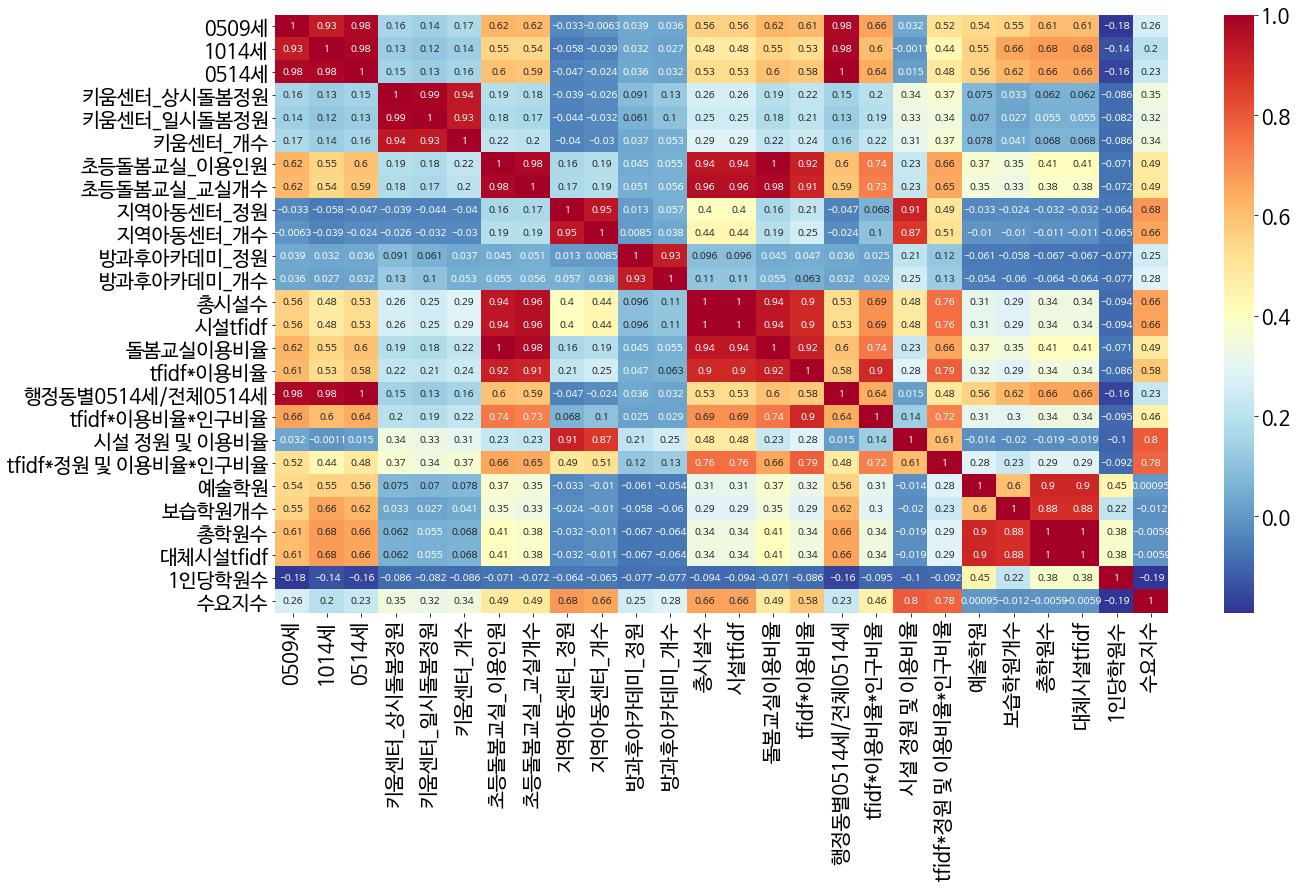

In [81]:
plt.figure(figsize=(20,11))
# mask = np.zeros_like(suyo, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
var= suyo[['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', '시설tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '시설 정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율', '예술학원', '보습학원개수', '총학원수', '대체시설tfidf', '1인당학원수',
       '수요지수', 'IQR']].corr()
sns.heatmap(var, annot=True,cmap = 'RdYlBu_r')
plt.rc('font', family='NanumBarunGothic') 
plt.show()

의미없는 시각화

In [51]:
suyo['총시설수'].value_counts().to_frame().style.background_gradient(cmap='Pastel1')

,총시설수
6.0,58
4.0,52
7.0,40
3.0,36
5.0,32
1.0,28
2.0,27
8.0,25
0.0,24
10.0,23


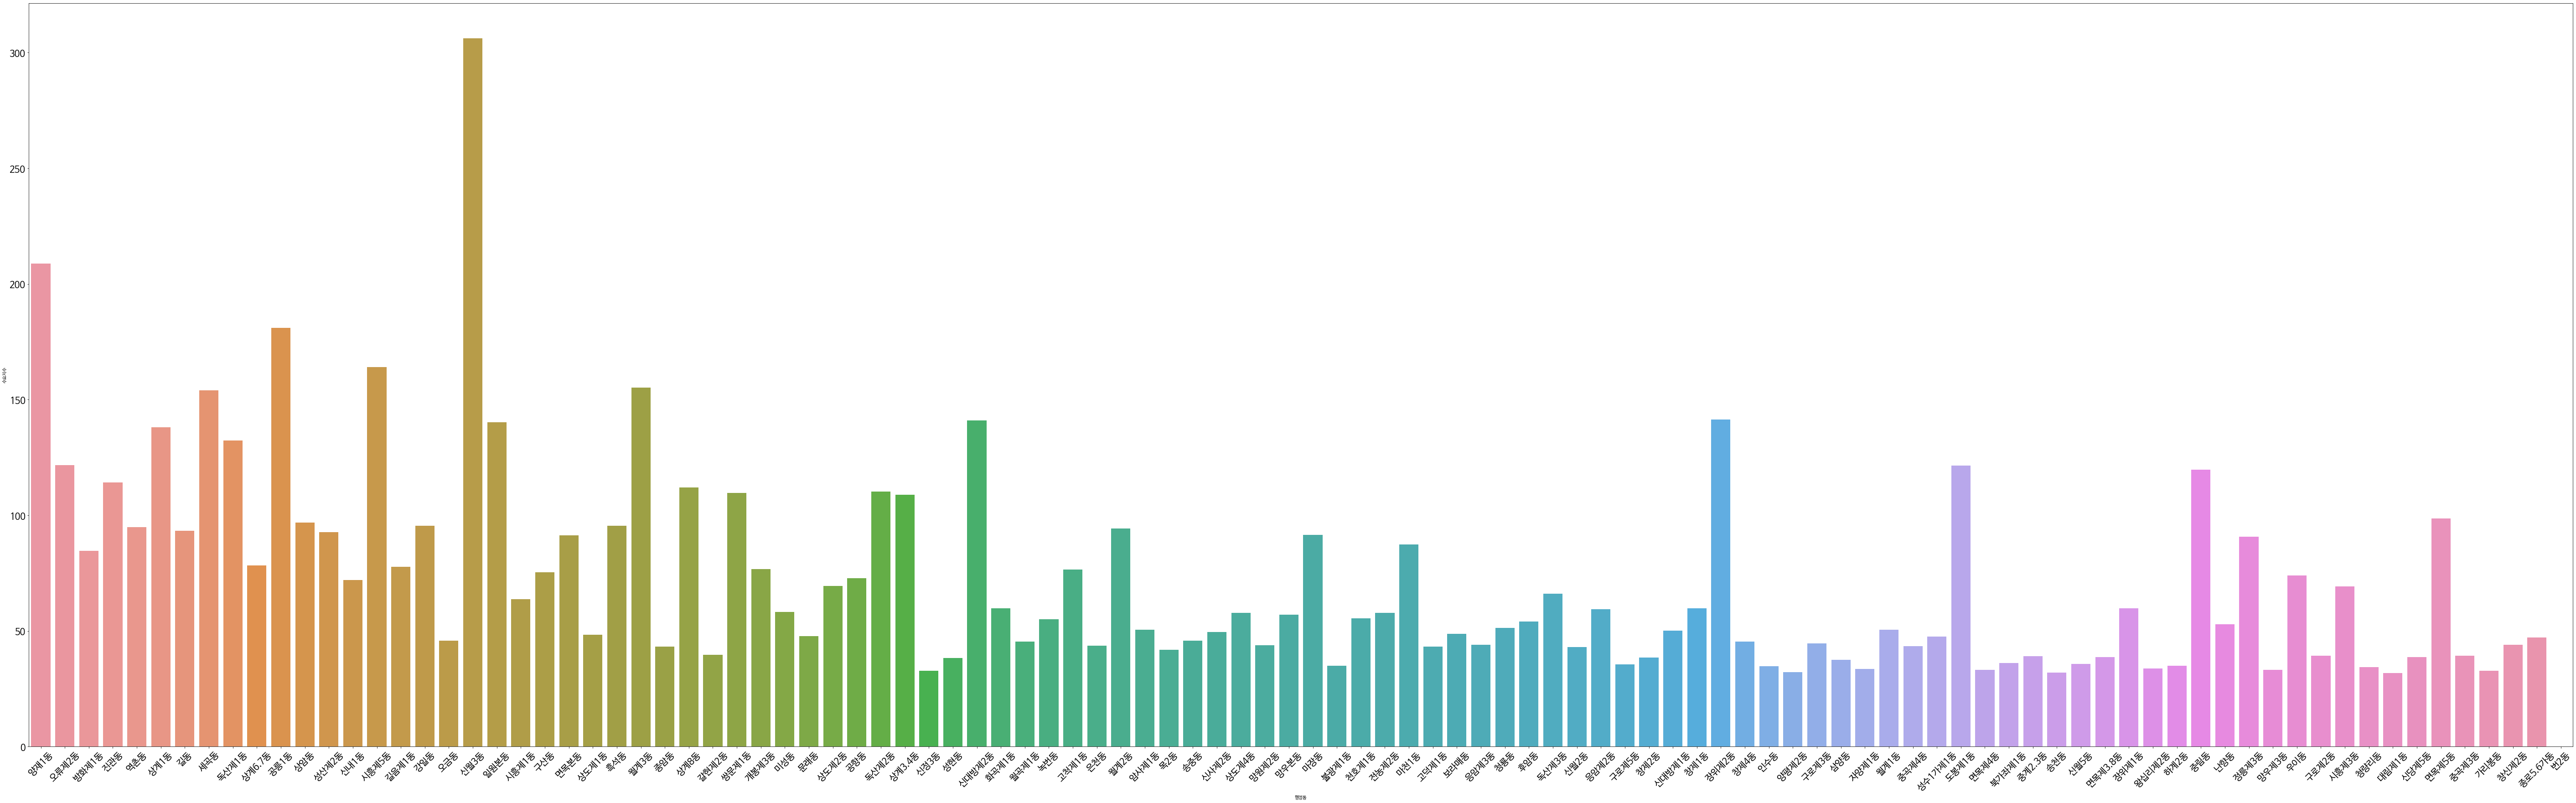

<Figure size 5760x1440 with 0 Axes>

In [52]:
plt.figure(figsize=(100,30))
sns.barplot(data=suyo[suyo['IQR']=='4'],x="행정동",y="수요지수")
sns.color_palette("Paired")
plt.rc('xtick', labelsize=20) 
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(80,20))
plt.show()